In [31]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from palmerpenguins import load_penguins
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [2]:
peng = load_penguins()

#### Pre-processing data
* Using pd.factorize(), transform the categorical variables into numbers.
* Afterward, impute the missing values for each column by the mean.
* Then, using train_test_split, generate a 80-20 split

In [3]:
# your code
peng["species"],uniq_spec = pd.factorize( peng["species"])

In [19]:
# filling missing vals

peng["bill_length_mm"].fillna(peng["bill_length_mm"].mean(), inplace = True)
peng["bill_depth_mm"].fillna(peng["bill_depth_mm"].mean(), inplace = True)
peng["flipper_length_mm"].fillna(peng["flipper_length_mm"].mean(), inplace = True)
peng["body_mass_g"].fillna(peng["body_mass_g"].mean(), inplace = True)
peng["sex"].fillna(peng["sex"].mode()[0], inplace = True)
peng["sex"],uniq_sex = pd.factorize(peng["sex"])
peng["island"],uniq_island_vals = pd.factorize(peng["island"])

peng


/var/folders/gn/hl68wgxj1dg3j7wh7shxt0jw0000gp/T/ipykernel_81938/3359383414.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  peng["bill_length_mm"].fillna(peng["bill_length_mm"].mean(), inplace = True)
/var/folders/gn/hl68wgxj1dg3j7wh7shxt0jw0000gp/T/ipykernel_81938/3359383414.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,39.10000,18.70000,181.000000,3750.000000,0,2007
1,0,0,39.50000,17.40000,186.000000,3800.000000,1,2007
2,0,0,40.30000,18.00000,195.000000,3250.000000,1,2007
3,0,0,43.92193,17.15117,200.915205,4201.754386,0,2007
4,0,0,36.70000,19.30000,193.000000,3450.000000,1,2007
...,...,...,...,...,...,...,...,...
339,2,2,55.80000,19.80000,207.000000,4000.000000,0,2009
340,2,2,43.50000,18.10000,202.000000,3400.000000,1,2009
341,2,2,49.60000,18.20000,193.000000,3775.000000,0,2009
342,2,2,50.80000,19.00000,210.000000,4100.000000,0,2009


In [20]:
X = peng.drop("species", axis=1)   # all columns except target
y = peng["species"]

In [22]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,       # 20% test, 80% train
    random_state=42,     # ensures reproducibility
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)

In [23]:
# Define model
class penguinNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(penguinNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size // 2, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [24]:
# Model parameters / You can vary this as you wish
input_size = 7
hidden_size = 16
output_size = 3
model = penguinNet(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [26]:
# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: compute predictions and loss
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass: compute gradients and update parameters
    optimizer.zero_grad()  # Reset gradients to zero
    loss.backward()        # Backpropagate the error
    optimizer.step()       # Update parameters
    
    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/1000], Loss: 0.6557
Epoch [20/1000], Loss: 0.1548
Epoch [30/1000], Loss: 0.0328
Epoch [40/1000], Loss: 0.0170
Epoch [50/1000], Loss: 0.0113
Epoch [60/1000], Loss: 0.0084
Epoch [70/1000], Loss: 0.0064
Epoch [80/1000], Loss: 0.0052
Epoch [90/1000], Loss: 0.0044
Epoch [100/1000], Loss: 0.0038
Epoch [110/1000], Loss: 0.0033
Epoch [120/1000], Loss: 0.0029
Epoch [130/1000], Loss: 0.0025
Epoch [140/1000], Loss: 0.0023
Epoch [150/1000], Loss: 0.0020
Epoch [160/1000], Loss: 0.0018
Epoch [170/1000], Loss: 0.0016
Epoch [180/1000], Loss: 0.0015
Epoch [190/1000], Loss: 0.0013
Epoch [200/1000], Loss: 0.0012
Epoch [210/1000], Loss: 0.0011
Epoch [220/1000], Loss: 0.0010
Epoch [230/1000], Loss: 0.0009
Epoch [240/1000], Loss: 0.0009
Epoch [250/1000], Loss: 0.0008
Epoch [260/1000], Loss: 0.0007
Epoch [270/1000], Loss: 0.0007
Epoch [280/1000], Loss: 0.0006
Epoch [290/1000], Loss: 0.0006
Epoch [300/1000], Loss: 0.0005
Epoch [310/1000], Loss: 0.0005
Epoch [320/1000], Loss: 0.0005
Epoch [330/1000],

#### Run this to evaluate your model!

In [28]:
with torch.no_grad():
    # Forward pass on the test set
    outputs = model(X_test_tensor)
    
    # Get predicted classes
    _, ypred = torch.max(outputs, 1)
    
    # Calculate accuracy
    total = y_test_tensor.size(0)
    correct = (ypred == y_test_tensor).sum().item()
    accuracy = correct / total * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 100.00%


### Generate a confusion matrix of the classifications

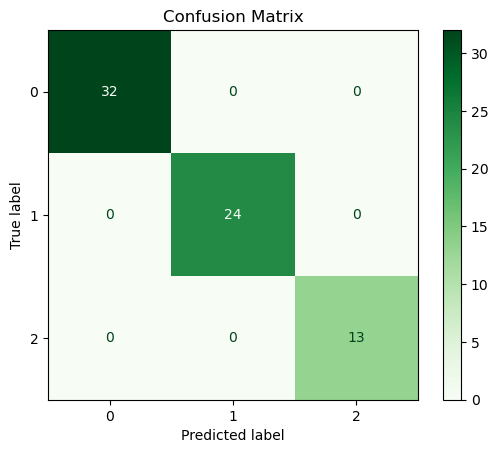

In [36]:
y_true = y_test_tensor.numpy()
y_pred = ypred.numpy()

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.show()

# Word2Vec: The Prehistoric LLM

In [2]:
# Import libraries
import nltk
from nltk.corpus import reuters
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [3]:
# Download necessary NLTK data files
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/mikedemayo/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mikedemayo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Load and preprocess the data
sentences = []
for fileid in reuters.fileids():
    words = reuters.words(fileid)
    sentences.append([word.lower() for word in words if word.isalpha()])

# Display a few example sentences
print("Example sentences:")
for i in range(2):
    print(sentences[i])

Example sentences:
['asian', 'exporters', 'fear', 'damage', 'from', 'u', 's', 'japan', 'rift', 'mounting', 'trade', 'friction', 'between', 'the', 'u', 's', 'and', 'japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'asia', 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', 'reaching', 'economic', 'damage', 'businessmen', 'and', 'officials', 'said', 'they', 'told', 'reuter', 'correspondents', 'in', 'asian', 'capitals', 'a', 'u', 's', 'move', 'against', 'japan', 'might', 'boost', 'protectionist', 'sentiment', 'in', 'the', 'u', 's', 'and', 'lead', 'to', 'curbs', 'on', 'american', 'imports', 'of', 'their', 'products', 'but', 'some', 'exporters', 'said', 'that', 'while', 'the', 'conflict', 'would', 'hurt', 'them', 'in', 'the', 'long', 'run', 'in', 'the', 'short', 'term', 'tokyo', 's', 'loss', 'might', 'be', 'their', 'gain', 'the', 'u', 's', 'has', 'said', 'it', 'will', 'impose', 'mln', 'dlrs', 'of', 'tariffs', 'on', 'imports', 'of', 'japanese', 'electronics'

In [5]:
# Define and train the Word2Vec model
model = Word2Vec(sentences, vector_size=40, 
                 window=5, 
                 min_count=5, 
                 sg=1, 
                 epochs=100)

# Display vocabulary size
print("Vocabulary size:", len(model.wv))

KeyboardInterrupt: 

In [1]:
# Finding words similar to 'market'
similar_words = model.wv.most_similar('market', topn=10)
print("Words similar to 'market':")

for word, score in similar_words:
    print(f"{word}: {score}")

NameError: name 'model' is not defined

In [42]:
# Choose a subset of words for visualization
words = ['market', 'economy', 'trade', 'finance', 'investment', 'growth', 'bank', 'money', 'stocks', 'currency']
word_vectors = np.array([model.wv[word] 
                         for w in words 
                         if w in model.wv])

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=2,)
word_vectors_2d = tsne.fit_transform(word_vectors)



/opt/anaconda3/lib/python3.12/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [ ]:
# Plot the words and their vectors
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])

# Annotate each point with the word
for i, word in enumerate(words):
    if word in model.wv:
        plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title("Word Embedding Visualization with t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")



## Exploring word2vec
* First, use two of your favorite word and identify the top 40 similar words.
* Then transform those words into vectors.
* Using Principal component analysis, plot the 80 words using MatPlotLib, coloring the two word groups differently
